In [2]:
!pip install yfinance

                                              0.0/69.0 kB ? eta -:--:--
     -----------------------                  41.0/69.0 kB 2.0 MB/s eta 0:00:01
     ---------------------------------      61.4/69.0 kB 825.8 kB/s eta 0:00:01
     -------------------------------------- 69.0/69.0 kB 752.9 kB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
                                              0.0/2.9 MB ? eta -:--:--
                                              0.0/2.9 MB ? eta -:--:--
                                              0.0/2.9 MB 667.8 kB/s eta 0:00:05
     -                                        0.1/2.9 MB 880.9 kB/s eta 0:00:04
     --                                       0.2/2.9 MB 1.0 MB/s eta 0:00:03
     ---                                      0.2/2.9 MB 1.2 MB/s eta 0:00:03
     ----                                     0.3/2.9 MB 1.3 MB/s eta 0:00:03
     -----                                    0.4/2.9 MB 1.5 MB/s eta 0:00:02
     ------       

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings

In [38]:
google=yf.Ticker('GOOG')
df=google.history('5Y')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-30 00:00:00-05:00,54.453499,54.778500,53.894001,54.721500,51604000,0.0,0.0
2018-12-03 00:00:00-05:00,56.157001,56.232498,55.183250,55.321499,39824000,0.0,0.0
2018-12-04 00:00:00-05:00,55.155998,55.221001,52.499001,52.541000,46904000,0.0,0.0
2018-12-06 00:00:00-05:00,51.713001,53.560001,51.538502,53.436501,55384000,0.0,0.0
2018-12-07 00:00:00-05:00,53.000500,53.763000,51.424999,51.828999,42024000,0.0,0.0


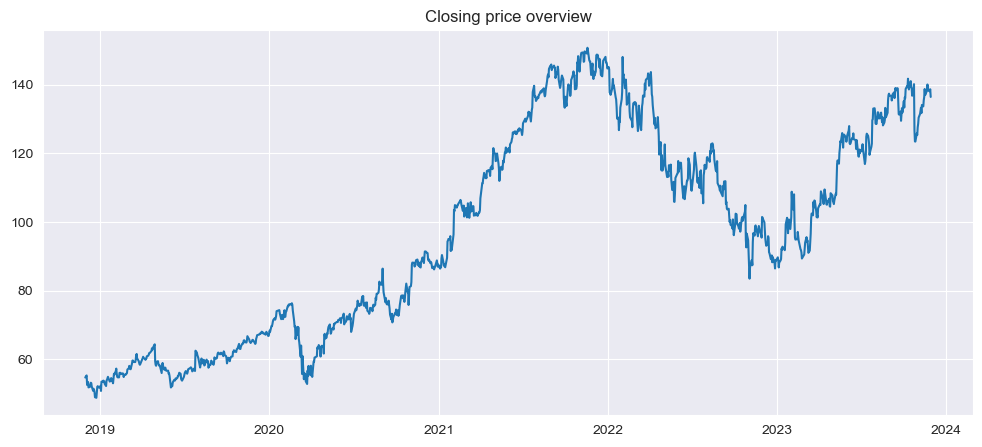

In [39]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
plt.title('Closing price overview')
plt.plot(df.Close)

In [40]:
df['fiftyDMA']=df['Close'].rolling(50).mean()
df['200DMA']=df['Close'].rolling(200).mean()

In [41]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,200DMA
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000,1208.000000,1058.000000
mean,97.240264,98.375484,96.224399,97.320631,2.942657e+07,0.0,0.015911,97.463811,98.235168
std,30.296716,30.580589,29.988927,30.273065,1.298131e+07,0.0,0.564108,29.331037,26.417606
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,53.358050,56.957718
25%,67.580498,68.234001,67.155502,67.594498,2.109600e+07,0.0,0.000000,68.398899,70.512554
50%,98.250000,99.910004,97.019997,98.500000,2.631600e+07,0.0,0.000000,97.364900,102.315624
75%,124.904999,126.163002,123.449997,124.830002,3.340200e+07,0.0,0.000000,123.843850,119.827300
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [42]:
df.drop(columns=['Dividends','Stock Splits'],inplace=True)


In [43]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2018-11-30 00:00:00-05:00,54.453499,54.778500,53.894001,54.721500,51604000,NaN,NaN
2018-12-03 00:00:00-05:00,56.157001,56.232498,55.183250,55.321499,39824000,NaN,NaN
2018-12-04 00:00:00-05:00,55.155998,55.221001,52.499001,52.541000,46904000,NaN,NaN
2018-12-06 00:00:00-05:00,51.713001,53.560001,51.538502,53.436501,55384000,NaN,NaN
2018-12-07 00:00:00-05:00,53.000500,53.763000,51.424999,51.828999,42024000,NaN,NaN


In [44]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2023-11-22 00:00:00-05:00,139.100006,141.100006,139.000000,140.020004,17306400,134.7032,120.361625
2023-11-24 00:00:00-05:00,139.539993,139.677002,137.470001,138.220001,8828600,134.6878,120.552725
2023-11-27 00:00:00-05:00,137.570007,139.630005,137.539993,138.050003,17886400,134.6828,120.765675
2023-11-28 00:00:00-05:00,137.630005,138.660004,137.039993,138.619995,17046900,134.6760,120.984475
2023-11-29 00:00:00-05:00,138.985001,139.669998,136.294998,136.399994,20994400,134.6274,121.191475


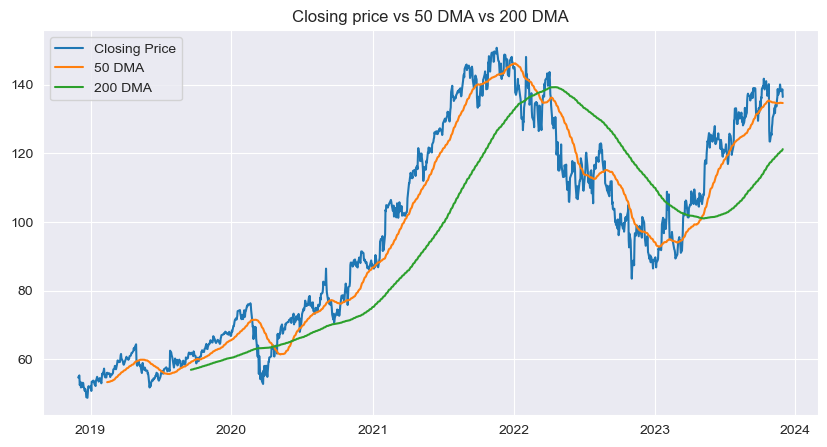

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing price vs 50 DMA vs 200 DMA')
plt.plot(df['Close'],label='Closing Price')
plt.plot(df['fiftyDMA'],label='50 DMA')
plt.plot(df['200DMA'],label='200 DMA')
plt.legend()

<Axes: >

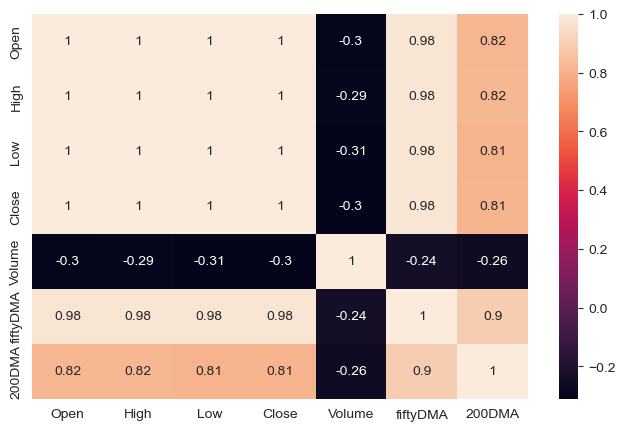

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

<Axes: title={'center': '50 DMA'}, xlabel='fiftyDMA', ylabel='Count'>

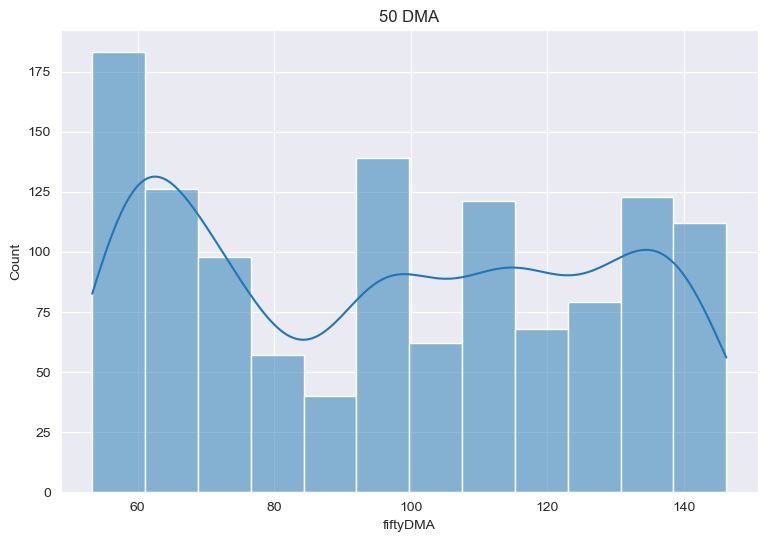

In [47]:
plt.figure(figsize=(9,6))
plt.title('50 DMA')
sns.histplot(x=df['fiftyDMA'],kde=True)

<Axes: title={'center': 'Closing Price'}, xlabel='Close', ylabel='Count'>

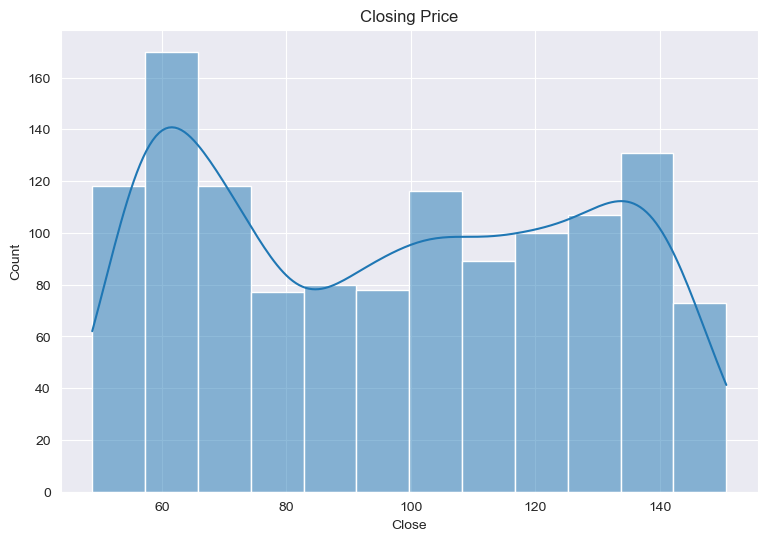

In [48]:
plt.figure(figsize=(9,6))
plt.title('Closing Price')
sns.histplot(x=df['Close'],kde=True)


In [49]:
import statsmodels.formula.api as smf

In [50]:
model=smf.ols(formula='Close ~ fiftyDMA',data=df)
model=model.fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.445e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:17:12   Log-Likelihood:                -3956.2
No. Observations:                1208   AIC:                             7916.
Df Residuals:                    1206   BIC:                             7927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3334      0.640      5.212      0.000       2.079       4.588
fiftyDMA       0.9826      0.006    156.364      0.000       0.970       0.995
==============================================================================
Omnibus:                       73.654   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.220
Skew:                          -0.621   Prob(JB):                     1.90e-19
Kurtosis:                       3.415   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

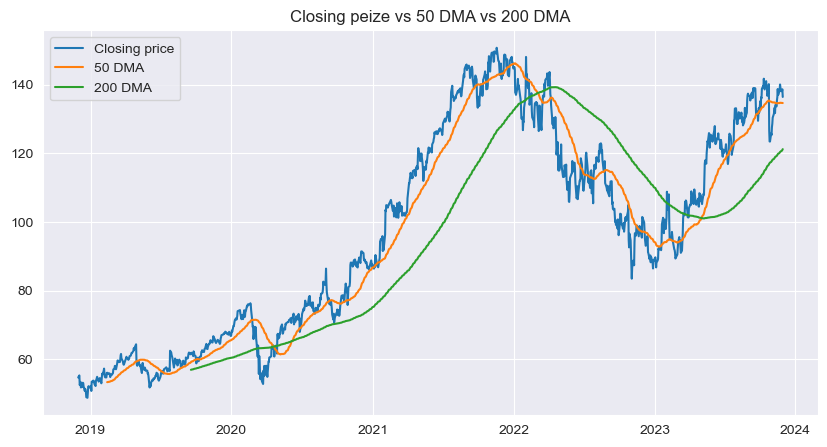

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing peize vs 50 DMA vs 200 DMA')
plt.plot(df['Close'],label='Closing price')
plt.plot(df['fiftyDMA'],label='50 DMA')
plt.plot(df['200DMA'],label='200 DMA')
plt.legend()

In [65]:
import pandas as pd
new_data=pd.DataFrame({'fiftyDMA':[105,100,103,150,250]})
predictions=model.predict(new_data)

In [66]:
print(predictions)

0    106.511497
1    101.598257
2    104.546201
3    150.730661
4    248.995470
dtype: float64


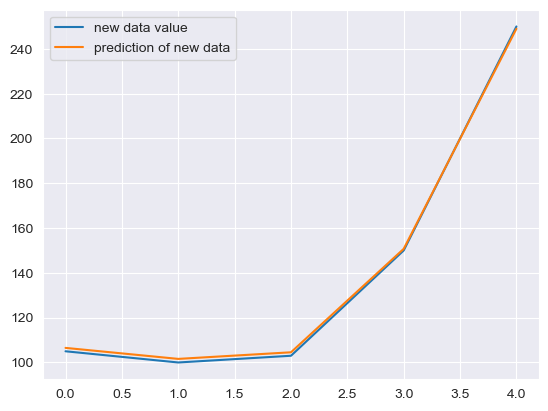

In [67]:
plt.plot(new_data,label='new data value')
plt.plot(predictions,label='prediction of new data')
plt.legend()